In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import jaccard_score, mean_absolute_error,mean_squared_error

In [36]:
ener_df=pd.read_csv('/home/jack/Documents/datasets/Energy Data1.csv', delimiter=',')
ener_df.head()

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Electricity Generation (Terawatt-hours),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
0,1991,20.6,65.44,2026.8,4481.0,"12,218",2247.96,2089.56,NaN,1.93
1,1992,20.5,65.71,2039.4,4432.0,"12,330",2240.48,2105.4,NaN,2.17
2,1993,20.6,65.99,2073.5,4327.0,"12,592",2364.56,2179.32,NaN,2.5
3,1994,20.7,66.89,2095.7,4402.0,"12,917",2382.16,2217.6,NaN,2.99
4,1995,21.3,67.85,2136.1,4557.0,"13,375",2508.44,2314.84,NaN,3.49


## Let's understand the data more by undertaking an Exploratory analysis of the data.

In [3]:
ener_df.columns

Index(['Year', 'Energy Related CO2missions (Gigatonnes)',
       'Oil Production (Million barrels per day)',
       'Natural Gas Production (Billion Cubic Metres)',
       'Coal Production (million tons)',
       'Electricity Generation (Terawatt-hours)',
       'Hydroelectricity consumption in TWh',
       'Nuclear energy consumption in TWh', 'Installed Solar Capacity (GW)',
       'Installed Wind Capacity in GW'],
      dtype='object')

In [4]:
ener_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 10 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           32 non-null     int64  
 1   Energy Related CO2missions (Gigatonnes)        31 non-null     float64
 2   Oil Production (Million barrels per day)       31 non-null     float64
 3   Natural Gas Production (Billion Cubic Metres)  30 non-null     float64
 4   Coal Production (million tons)                 30 non-null     float64
 5   Electricity Generation (Terawatt-hours)        31 non-null     object 
 6   Hydroelectricity consumption in TWh            31 non-null     float64
 7   Nuclear energy consumption in TWh              31 non-null     float64
 8   Installed Solar Capacity (GW)                  22 non-null     float64
 9   Installed Wind Capacity in GW                  31 non-nu

In [5]:
ener_df.describe()

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
count,32.000000,31.000000,31.000000,30.000000,30.000000,31.000000,31.000000,22.000000,31.000000
mean,2006.500000,27.138710,80.171613,2857.516667,6119.933333,3170.965161,2557.062581,199.659091,206.760645
std,9.380832,4.754414,9.261791,613.898801,1440.395011,690.236350,206.908241,279.291053,251.577548
min,1991.000000,20.500000,65.440000,2026.800000,4327.000000,2240.480000,2089.560000,1.300000,1.930000
25%,1998.750000,22.350000,72.565000,2297.900000,4621.250000,2618.220000,2442.000000,5.500000,11.900000
50%,2006.500000,27.800000,82.010000,2819.900000,6194.500000,3023.680000,2624.160000,55.000000,74.000000
75%,2014.250000,31.900000,87.530000,3356.275000,7567.500000,3826.020000,2712.820000,288.500000,344.500000
max,2022.000000,33.500000,94.960000,3976.200000,7976.000000,4370.000000,2800.270000,939.000000,837.000000


Year                                              0
Energy Related CO2missions (Gigatonnes)           1
Oil Production (Million barrels per day)          1
Natural Gas Production (Billion Cubic Metres)     2
Coal Production (million tons)                    2
Electricity Generation (Terawatt-hours)           1
Hydroelectricity consumption in TWh               1
Nuclear energy consumption in TWh                 1
Installed Solar Capacity (GW)                    10
Installed Wind Capacity in GW                     1
dtype: int64


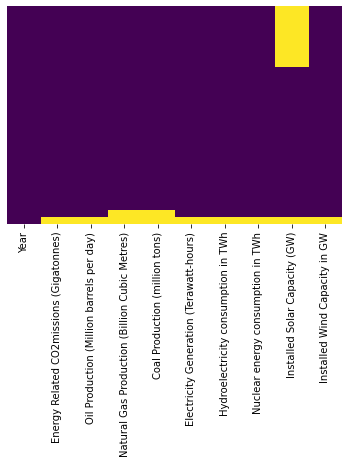

In [6]:
sns.heatmap(ener_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
print(ener_df.isnull().sum())

In [40]:
ener_df['Electricity Generation (Terawatt-hours)']=ener_df['Electricity Generation (Terawatt-hours)'].str.replace(',','.').astype('float64')

In [48]:
def mean_col(col):
    return col.mean()

In [55]:
col=['Energy Related CO2missions (Gigatonnes)',
       'Oil Production (Million barrels per day)',
       'Natural Gas Production (Billion Cubic Metres)',
       'Coal Production (million tons)',
       'Electricity Generation (Terawatt-hours)',
       'Hydroelectricity consumption in TWh',
       'Nuclear energy consumption in TWh', 'Installed Solar Capacity (GW)',
       'Installed Wind Capacity in GW']
for i in col:
    ener_df[i]=ener_df[i].astype('float64')
ener_df.dtypes

Year                                               int64
Energy Related CO2missions (Gigatonnes)          float64
Oil Production (Million barrels per day)         float64
Natural Gas Production (Billion Cubic Metres)    float64
Coal Production (million tons)                   float64
Electricity Generation (Terawatt-hours)          float64
Hydroelectricity consumption in TWh              float64
Nuclear energy consumption in TWh                float64
Installed Solar Capacity (GW)                    float64
Installed Wind Capacity in GW                    float64
dtype: object

In [80]:
values=dict()
for i in col:
    values.update({i:mean_col(ener_df[i])})
ener_df =ener_df.fillna(value= values)
ener_df.head(10)

,Year,Energy Related CO2missions (Gigatonnes),Oil Production (Million barrels per day),Natural Gas Production (Billion Cubic Metres),Coal Production (million tons),Electricity Generation (Terawatt-hours),Hydroelectricity consumption in TWh,Nuclear energy consumption in TWh,Installed Solar Capacity (GW),Installed Wind Capacity in GW
0,1991,20.6,65.44,2026.8,4481.0,12.218,2247.96,2089.56,199.659091,1.93
1,1992,20.5,65.71,2039.4,4432.0,12.330,2240.48,2105.40,199.659091,2.17
2,1993,20.6,65.99,2073.5,4327.0,12.592,2364.56,2179.32,199.659091,2.50
3,1994,20.7,66.89,2095.7,4402.0,12.917,2382.16,2217.60,199.659091,2.99
4,1995,21.3,67.85,2136.1,4557.0,13.375,2508.44,2314.84,199.659091,3.49
5,1996,21.7,69.67,2230.0,4622.0,13.789,2548.92,2397.12,199.659091,6.10
6,1997,22.1,71.85,2233.0,4621.0,14.121,2589.40,2381.28,199.659091,7.60
7,1998,22.3,73.28,2284.1,4569.0,14.503,2620.64,2422.20,199.659091,10.20
8,1999,22.4,71.83,2339.3,4499.0,14.918,2640.00,2514.16,199.659091,13.60
9,2000,23.1,74.48,2421.8,4638.0,15.556,2714.36,2574.00,1.300000,17.00


In [81]:
ener_df.isnull().sum()

Year                                             0
Energy Related CO2missions (Gigatonnes)          0
Oil Production (Million barrels per day)         0
Natural Gas Production (Billion Cubic Metres)    0
Coal Production (million tons)                   0
Electricity Generation (Terawatt-hours)          0
Hydroelectricity consumption in TWh              0
Nuclear energy consumption in TWh                0
Installed Solar Capacity (GW)                    0
Installed Wind Capacity in GW                    0
dtype: int64

In [99]:
ener_df=ener_df.drop(columns='Installed Solar Capacity (GW)')

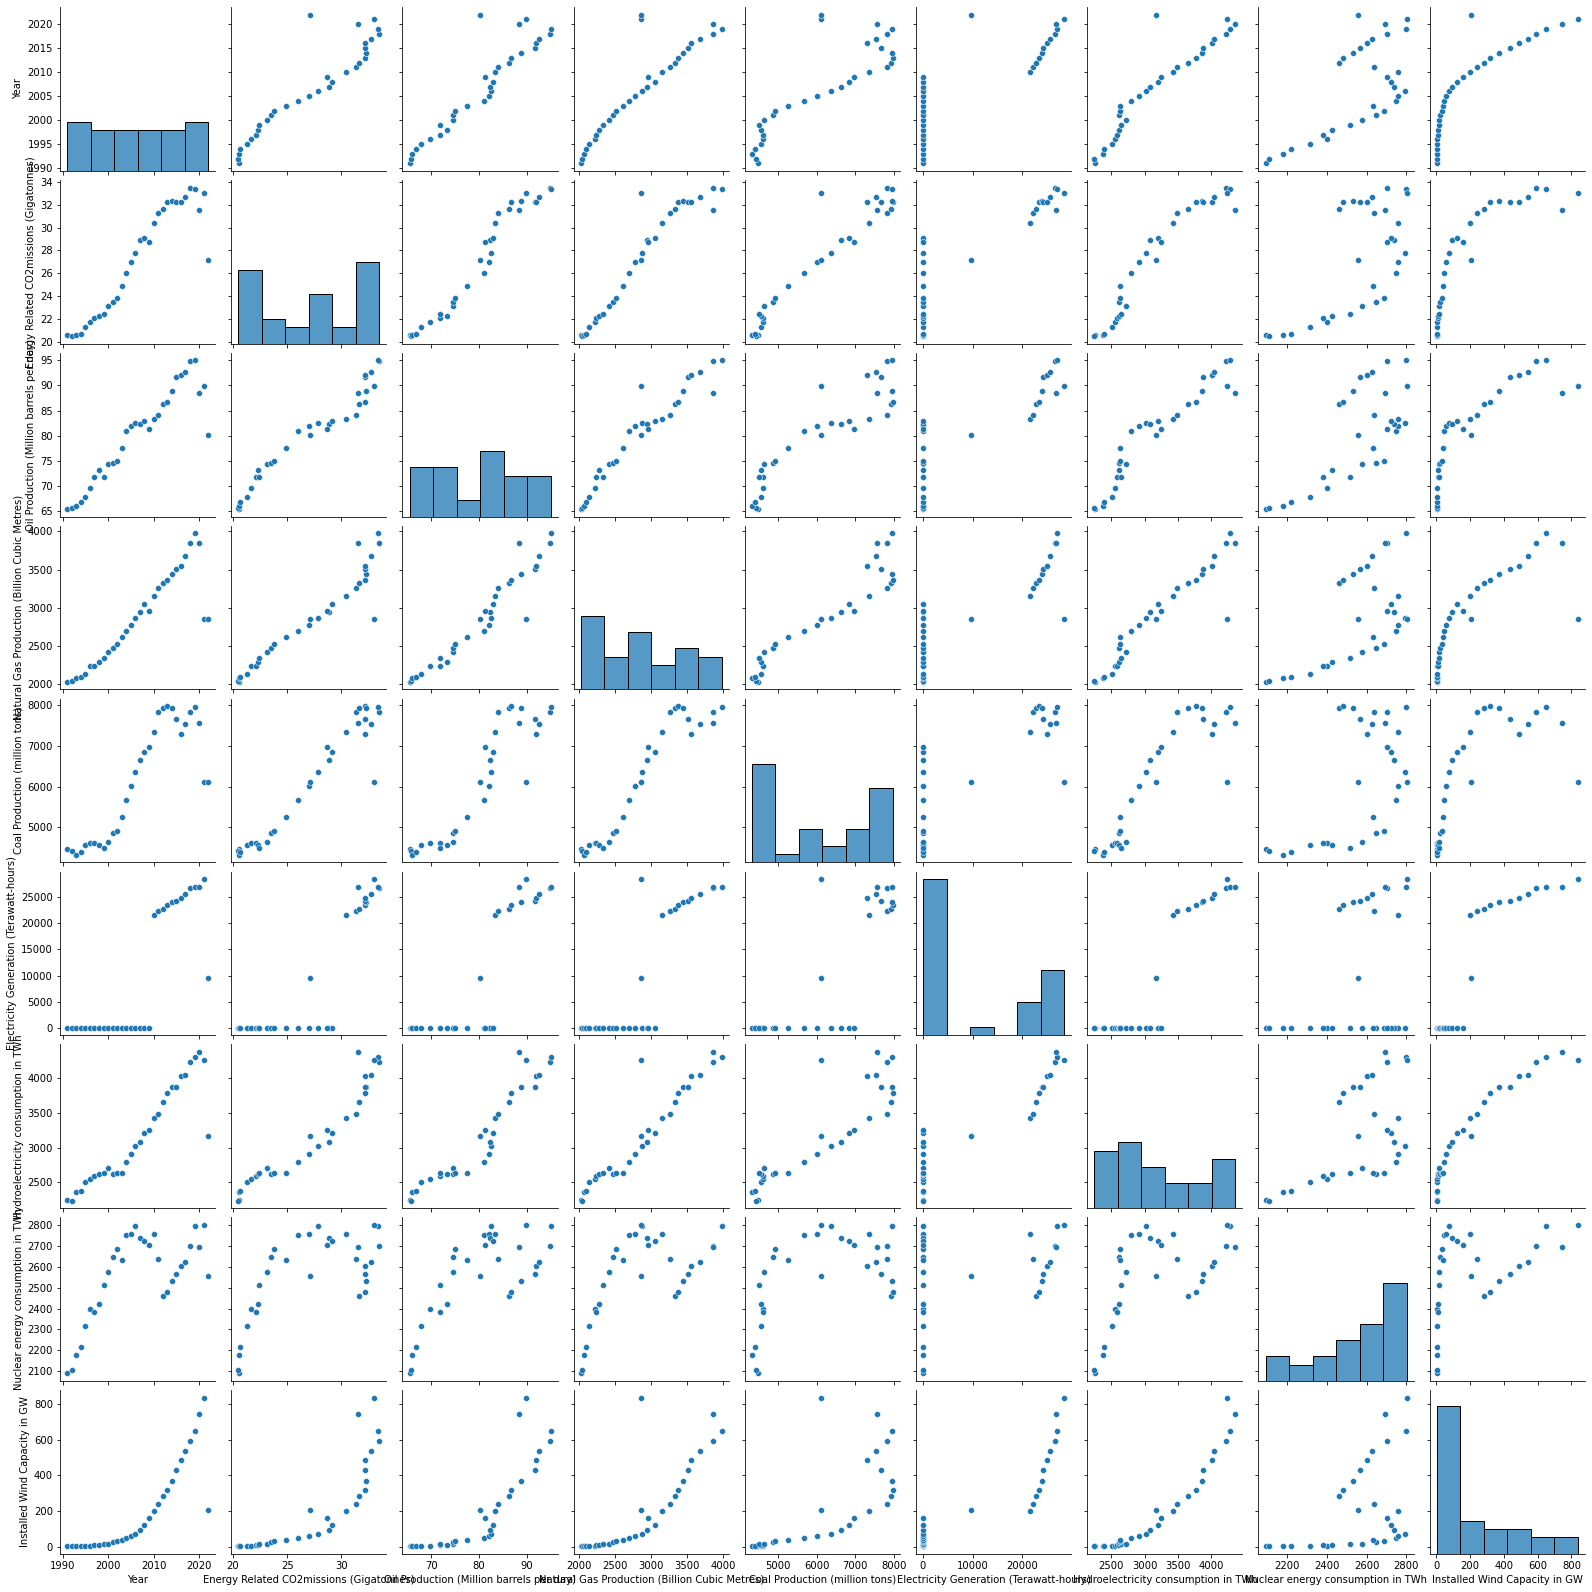

In [100]:
sns.pairplot(ener_df)

Year                                                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Energy Related CO2missions (Gigatonnes)           AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Oil Production (Million barrels per day)          AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Natural Gas Production (Billion Cubic Metres)     AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Coal Production (million tons)                      AxesSubplot(0.125,0.518913;0.168478x0.16413)
Electricity Generation (Terawatt-hours)          AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Hydroelectricity consumption in TWh              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Nuclear energy consumption in TWh                AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Installed Wind Capacity in GW                       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

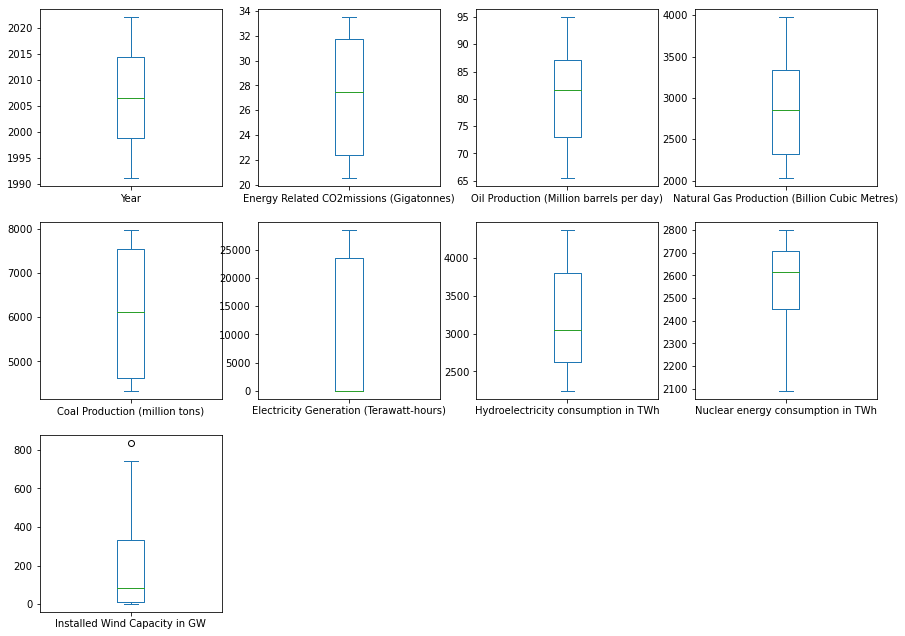

In [128]:
ener_df.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))


<AxesSubplot:xlabel='Year', ylabel='Energy Related CO2missions (Gigatonnes)'>

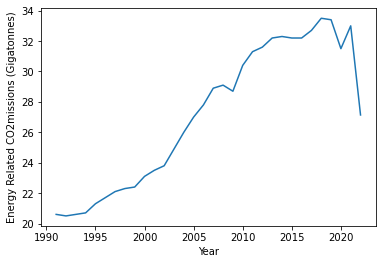

In [77]:
sns.lineplot(data=ener_df,x='Year', y='Energy Related CO2missions (Gigatonnes)')

In [103]:
#machine prediction
colz=['Oil Production (Million barrels per day)',
       'Natural Gas Production (Billion Cubic Metres)',
       'Coal Production (million tons)',
       'Electricity Generation (Terawatt-hours)',
       'Hydroelectricity consumption in TWh',
       'Nuclear energy consumption in TWh',
       'Installed Wind Capacity in GW']
X=ener_df[colz]
y=ener_df['Energy Related CO2missions (Gigatonnes)']

In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print (X_train.shape)

(21, 7)


In [107]:
log_ener= LinearRegression()
log_ener.fit(X_train,y_train)

LinearRegression()

In [111]:
predictions= log_ener.predict(X_test)
print(predictions[:5])

[31.64083824 27.97497341 32.25060184 29.22110454 22.23847462]


In [112]:
print(y_test[:5])

29    31.5
15    27.8
24    32.2
17    29.1
8     22.4
Name: Energy Related CO2missions (Gigatonnes), dtype: float64


In [109]:
from sklearn.metrics import accuracy_score

In [123]:
print("Mean Absolute Error: "+str(mean_absolute_error(y_test, predictions)))
print("Mean Squared Error: "+str(mean_squared_error(y_test, predictions)))
# print("Root Mean Squared Error: "+ str(np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.7669957865441664
Mean Squared Error: 4.497448741147063


In [129]:
from sklearn.metrics import r2_score
print("R2 Score "+ str(r2_score(y_test, predictions)))

R2 Score 0.7844360080495961
